In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn h5py


   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 929.6 kB/s eta 0:00:14
   -- ------------------------------------- 0.8/12.6 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.6 MB 1.5 MB/s eta 0:00:08
   ---- ----------------------------------- 1.6/12.6 MB 1.6 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/12.6 MB 1.6 MB/s eta 0:00:07
   ------ --------------------------------- 2.1/12.6 MB 1.6 MB/s eta 0:00:07
   -------- ------------------------------- 2.6/12.6 MB 1.5 MB/s eta 0:00:07
   --------- ------------------------------ 2.9/12.6 MB 1.6 MB/s eta 0:00:07
   ---------- ----------------------------- 3.4/12.6 MB 1.6 MB/s eta 0:00:06
   ----------- ---------------------------- 3.7/12.6 MB 1.6 MB/s eta 0:00:06
   ------------- -------------------------- 4.2/12.6 MB 1.6 MB/s eta 0:00:06
   -------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [3]:
data = pd.read_csv('divorce_data.csv', delimiter=';')

In [4]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

#**TRAINING A MODEL**

In [6]:
y = data['Divorce'].copy()
X = data.drop('Divorce', axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [7]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
12,3,4,3,4,3,0,1,4,3,4,...,4,4,4,4,4,4,4,4,4,4
150,0,3,2,0,0,0,0,0,0,0,...,4,4,4,3,1,1,1,2,0,1
149,0,1,0,0,0,0,0,0,0,0,...,4,4,4,4,4,2,2,0,0,0
28,3,4,3,2,3,0,1,4,3,2,...,4,4,4,4,4,4,4,4,4,4
156,0,0,1,1,0,0,0,0,0,2,...,0,2,1,2,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,2,0,0,0,0,0,0,0,0,...,0,2,1,2,2,2,2,2,1,0
137,0,0,1,0,0,0,0,1,1,0,...,3,3,3,3,0,1,3,3,3,1
72,3,3,3,3,3,1,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
140,0,2,0,0,0,1,0,0,0,0,...,1,1,2,2,1,0,1,3,2,2


In [8]:
y_train

12     1
150    0
149    0
28     1
156    0
      ..
133    0
137    0
72     1
140    0
37     1
Name: Divorce, Length: 118, dtype: int64

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 96.15%


In [10]:
# Save the original model
with h5py.File('original_model.h5', 'w') as h5file:
    h5file.create_dataset('coefficients', data=model.coef_)
    h5file.create_dataset('intercept', data=model.intercept_)

# **USING PCA FOR DIMENSIONALITY REDUCTION**

In [11]:
X_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54
12,3,4,3,4,3,0,1,4,3,4,...,4,4,4,4,4,4,4,4,4,4
150,0,3,2,0,0,0,0,0,0,0,...,4,4,4,3,1,1,1,2,0,1
149,0,1,0,0,0,0,0,0,0,0,...,4,4,4,4,4,2,2,0,0,0
28,3,4,3,2,3,0,1,4,3,2,...,4,4,4,4,4,4,4,4,4,4
156,0,0,1,1,0,0,0,0,0,2,...,0,2,1,2,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,2,0,0,0,0,0,0,0,0,...,0,2,1,2,2,2,2,2,1,0
137,0,0,1,0,0,0,0,1,1,0,...,3,3,3,3,0,1,3,3,3,1
72,3,3,3,3,3,1,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
140,0,2,0,0,0,1,0,0,0,0,...,1,1,2,2,1,0,1,3,2,2


In [12]:
n_components = 54

pca = PCA(n_components=n_components)
pca.fit(X_train)

pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=['PC' + str(i) for i in range(1, n_components + 1)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
12,14.066466,0.065186,-0.810092,1.391413,0.603331,1.032619,-1.856151,-0.928209,-0.119226,1.371791,...,-0.010714,-0.015973,0.070679,-0.058963,0.018422,-0.006844,0.005728,-0.013894,-0.025848,0.016100
150,-8.582718,3.543475,-2.860693,-0.718076,0.227951,0.035169,-2.338792,-1.715401,1.697381,-0.379319,...,-0.281977,-0.100944,-0.125119,0.040352,0.164477,0.033003,-0.015102,-0.207558,-0.063724,-0.073654
149,-8.548589,4.145983,-4.055091,-2.128593,2.438771,-0.097365,-0.728773,1.263579,1.254430,0.350033,...,0.016919,0.293034,-0.079664,0.188313,-0.045556,0.216864,0.113655,0.208302,0.097250,0.111399
28,12.748873,1.135939,-0.047615,1.160251,0.003013,1.158083,-2.667211,0.338645,-0.025645,-1.251005,...,-0.012309,-0.043695,0.062812,-0.048466,0.011441,0.034581,-0.017526,0.015784,-0.008936,0.019725
156,-7.870086,-1.805395,0.221772,-1.231504,0.141632,1.062326,-0.063183,-1.393429,0.010069,0.962790,...,0.289044,0.586204,-0.178715,0.179819,-0.081995,0.156704,0.159060,0.274661,0.157579,-0.005253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,-8.495490,-0.508305,0.541573,1.314817,1.032915,1.834335,0.609724,0.437751,-0.027999,-0.102420,...,0.366431,0.301435,0.160337,-0.070509,-0.020721,0.246261,-0.285546,-0.102485,-0.021913,0.044653
137,-8.845278,2.717350,0.367302,1.781332,-0.159814,-1.269320,-1.127132,-1.365665,1.091692,0.039301,...,-0.038923,-0.042699,-0.157641,-0.018156,0.054272,0.088302,-0.040955,0.120556,-0.044615,-0.167234
72,9.032262,-1.283010,-1.104992,1.114686,0.073987,0.099858,0.305795,-0.213731,0.215465,0.344653,...,0.027473,-0.021033,0.059422,-0.001284,-0.034095,-0.025716,-0.085987,-0.089251,0.020283,-0.008188
140,-8.453574,0.518549,0.465545,1.019478,-1.699143,0.461717,-1.131805,-0.269720,-0.752292,-0.339372,...,-0.133069,-0.198579,0.289980,0.207759,-0.252628,-0.137232,-0.112458,0.027600,0.036452,-0.057763


In [13]:
X_train.var()

Q1     2.538606
Q2     2.058236
Q3     1.957410
Q4     2.246270
Q5     2.572287
Q6     0.913009
Q7     0.781979
Q8     2.258801
Q9     2.330364
Q10    1.958931
Q11    2.570549
Q12    2.112777
Q13    2.045777
Q14    2.183761
Q15    2.252064
Q16    2.177894
Q17    2.505939
Q18    2.385340
Q19    2.606475
Q20    2.279951
Q21    2.018036
Q22    1.987324
Q23    2.453426
Q24    2.080038
Q25    2.250978
Q26    2.133275
Q27    2.011951
Q28    2.126974
Q29    2.397219
Q30    2.164059
Q31    2.539765
Q32    2.632189
Q33    3.157250
Q34    2.434014
Q35    3.320296
Q36    3.172606
Q37    2.789005
Q38    2.927785
Q39    2.878531
Q40    3.178039
Q41    2.861437
Q42    2.392655
Q43    1.803853
Q44    2.908880
Q45    2.132189
Q46    1.800449
Q47    2.404462
Q48    1.228814
Q49    2.257352
Q50    1.920976
Q51    1.557946
Q52    2.217949
Q53    2.302187
Q54    2.727800
dtype: float64

In [14]:
n_components = 8

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=['PC' + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=['PC' + str(i) for i in range(1, n_components + 1)])

In [15]:
X_test_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
48,11.642674,2.633215,1.350218,-1.656010,-0.107926,-0.608353,2.650494,0.528233
91,-10.571378,-0.457121,0.497469,0.046669,1.598593,0.910900,0.642894,0.517464
19,13.956344,-0.935122,-2.038320,2.314250,0.661466,0.953301,0.288475,-0.672133
35,12.202344,1.461944,0.464855,-0.192584,0.107077,0.345433,-0.677329,-0.053841
164,-7.847375,-2.197207,1.134587,-0.015044,0.455780,0.329464,0.770010,1.199195
88,-10.548197,-4.228985,0.169560,-0.311378,2.036062,-0.318522,0.576806,0.103918
106,-9.748035,2.654306,-0.782111,0.142682,1.279940,-0.868462,-0.480232,-0.266659
14,13.914752,-0.050750,-0.643427,1.539257,0.593361,1.165409,-1.874148,-1.288603
123,-9.023737,0.629521,0.441387,0.791288,2.013560,-0.076438,1.015400,1.912523
118,-9.005847,0.257779,-0.731784,0.704235,2.792600,0.042438,1.482488,2.052170


In [16]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
12,14.066466,0.065186,-0.810092,1.391413,0.603331,1.032619,-1.856151,-0.928209
150,-8.582718,3.543475,-2.860693,-0.718076,0.227951,0.035169,-2.338792,-1.715401
149,-8.548589,4.145983,-4.055091,-2.128593,2.438771,-0.097365,-0.728773,1.263579
28,12.748873,1.135939,-0.047615,1.160251,0.003013,1.158083,-2.667211,0.338645
156,-7.870086,-1.805395,0.221772,-1.231504,0.141632,1.062326,-0.063183,-1.393429
...,...,...,...,...,...,...,...,...
133,-8.495490,-0.508305,0.541573,1.314817,1.032915,1.834335,0.609724,0.437751
137,-8.845278,2.717350,0.367302,1.781332,-0.159814,-1.269320,-1.127132,-1.365665
72,9.032262,-1.283010,-1.104992,1.114686,0.073987,0.099858,0.305795,-0.213731
140,-8.453574,0.518549,0.465545,1.019478,-1.699143,0.461717,-1.131805,-0.269720


In [17]:
X_train_reduced.var()

PC1    94.289739
PC2     4.671466
PC3     3.137466
PC4     2.128398
PC5     1.943608
PC6     1.640296
PC7     1.408071
PC8     1.252030
dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_16204\165790333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')


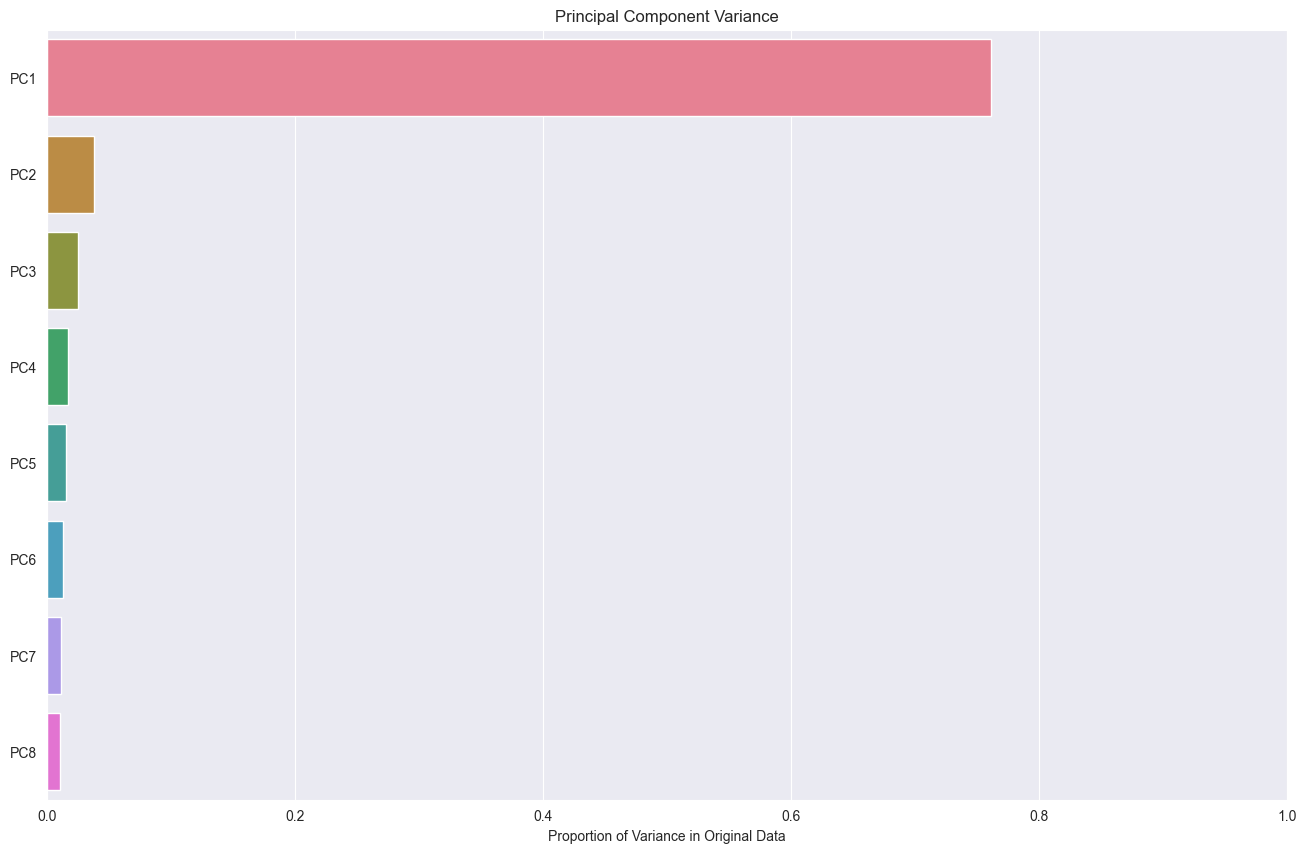

In [18]:
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i) for i in range(1, n_components + 1)], orient='h', palette='husl')
plt.xlim(0., 1.)
plt.xlabel('Proportion of Variance in Original Data')
plt.title('Principal Component Variance')
plt.show()

In [19]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy ({} Components): {:.2f}%".format(n_components, reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (8 Components): 96.15%


# **USING PCA VISUALIZATION**

In [20]:
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [21]:
X_train_reduced

,PC1,PC2
12,14.066466,0.065186
150,-8.582718,3.543475
149,-8.548589,4.145983
28,12.748873,1.135939
156,-7.870086,-1.805395
...,...,...
133,-8.495490,-0.508305
137,-8.845278,2.717350
72,9.032262,-1.283010
140,-8.453574,0.518549


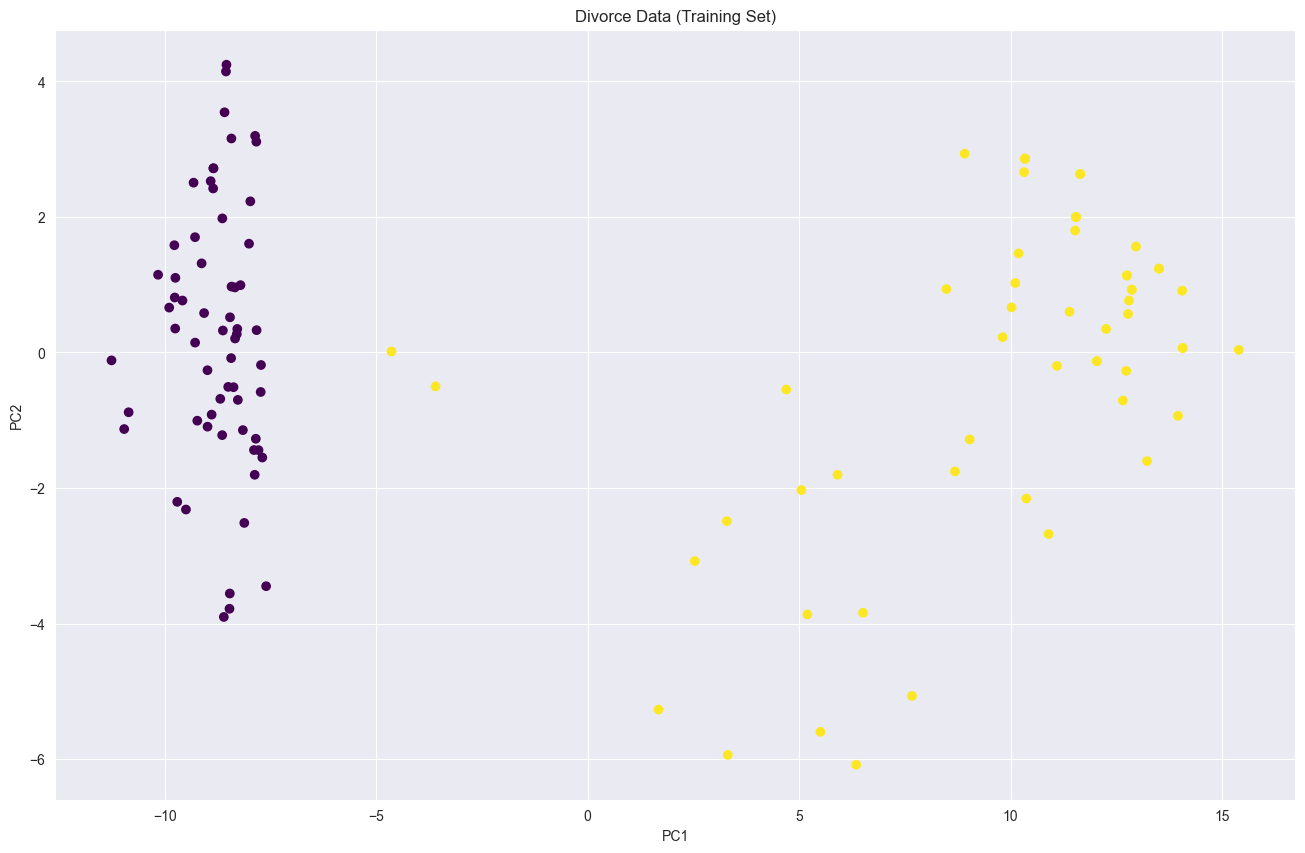

In [22]:
plt.figure(figsize=(16, 10))
plt.scatter(X_train_reduced['PC1'], X_train_reduced['PC2'], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Divorce Data (Training Set)')
plt.show()

In [23]:
X_train_reduced.loc[y_train == 0, 'PC2']

150    3.543475
149    4.145983
156   -1.805395
130   -0.084000
110    0.580768
         ...   
129    2.419276
144   -0.700210
133   -0.508305
137    2.717350
140    0.518549
Name: PC2, Length: 62, dtype: float64

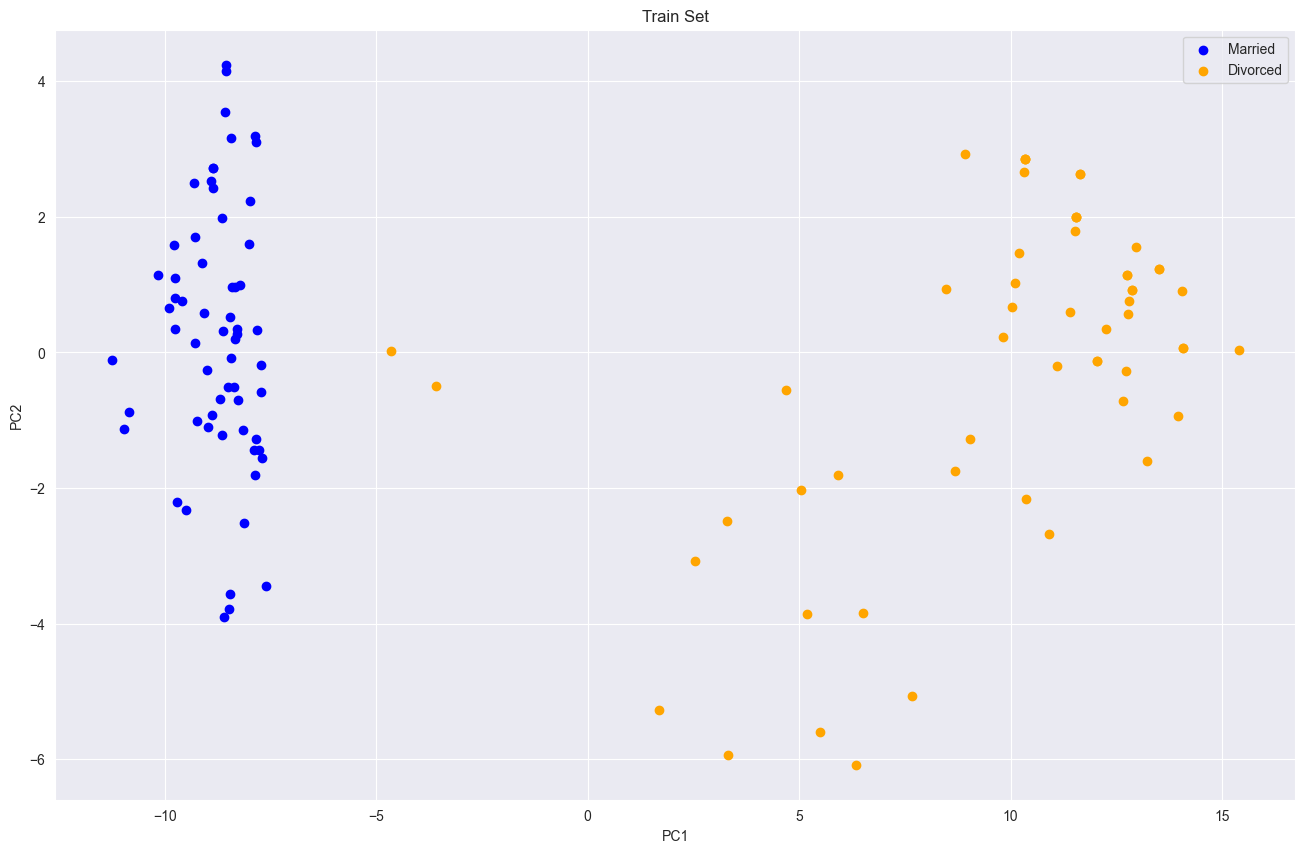

In [24]:
plt.figure(figsize=(16, 10))
plt.scatter(X_train_reduced.loc[y_train == 0, 'PC1'], X_train_reduced.loc[y_train == 0, 'PC2'], label="Married", color='blue')
plt.scatter(X_train_reduced.loc[y_train == 1, 'PC1'], X_train_reduced.loc[y_train == 1, 'PC2'], label="Divorced", color='orange')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Train Set")
plt.legend()
plt.show()


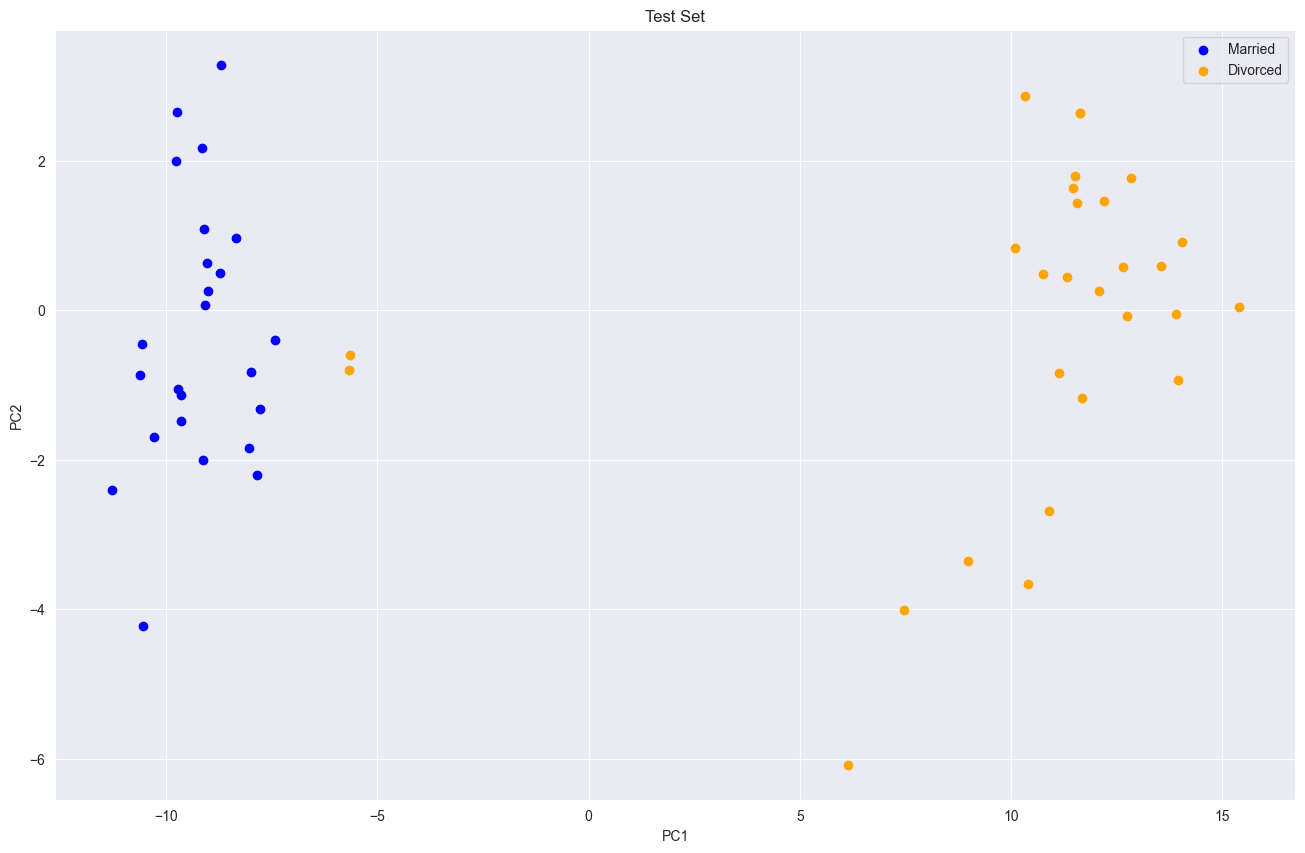

In [25]:
plt.figure(figsize=(16, 10))
plt.scatter(X_test_reduced.loc[y_test == 0, 'PC1'], X_test_reduced.loc[y_test == 0, 'PC2'], label="Married", color='blue')
plt.scatter(X_test_reduced.loc[y_test == 1, 'PC1'], X_test_reduced.loc[y_test == 1, 'PC2'], label="Divorced", color='orange')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Test Set")
plt.legend()
plt.show()

In [26]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy ({} Components): {:.2f}%".format(n_components, reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (2 Components): 96.15%


In [27]:
misclassifications = X_test_reduced.loc[reduced_model.predict(X_test_reduced) != y_test, :]
misclassifications

,PC1,PC2
4,-5.637804,-0.597580
5,-5.674198,-0.800159


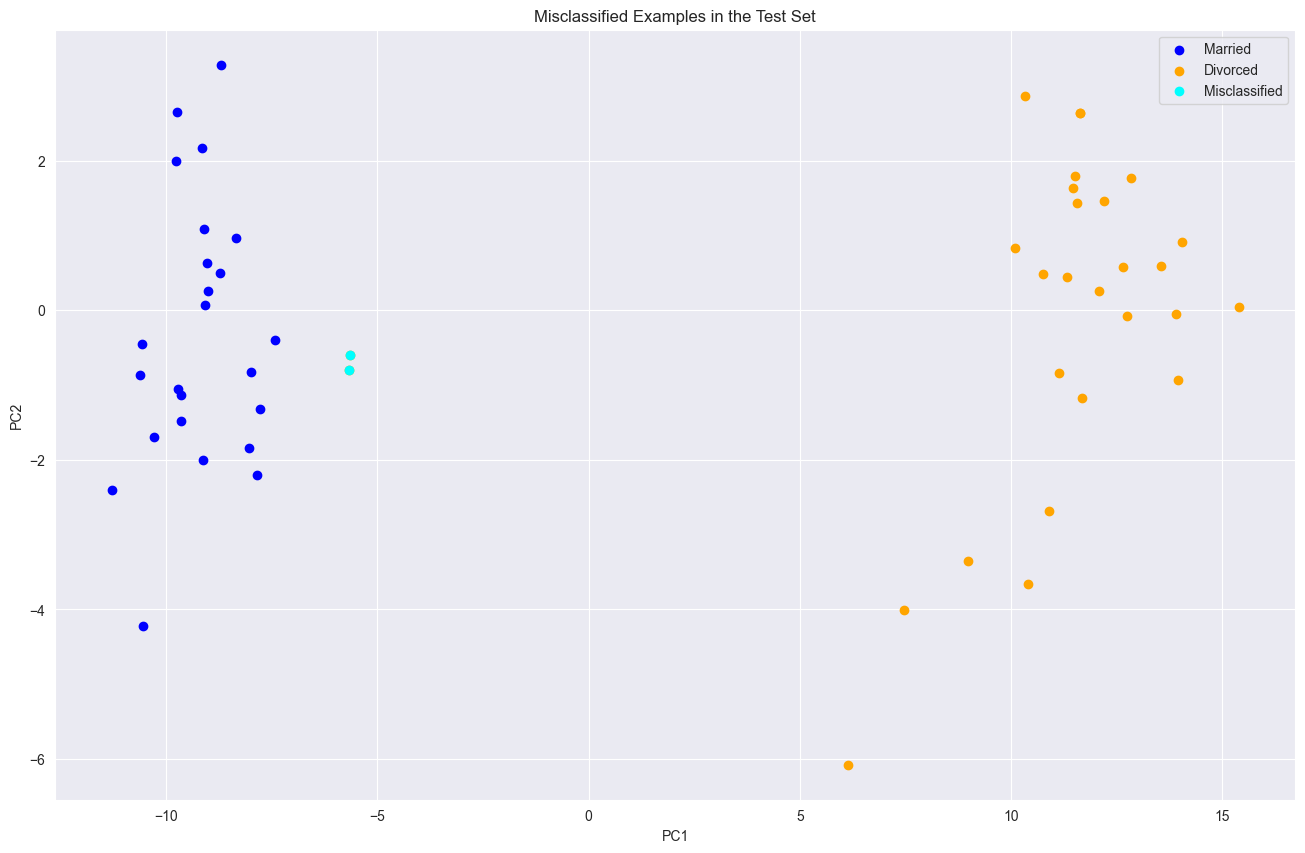

In [28]:
plt.figure(figsize=(16, 10))
plt.scatter(X_test_reduced.loc[y_test == 0, 'PC1'], X_test_reduced.loc[y_test == 0, 'PC2'], label="Married", color='blue')
plt.scatter(X_test_reduced.loc[y_test == 1, 'PC1'], X_test_reduced.loc[y_test == 1, 'PC2'], label="Divorced", color='orange')
plt.scatter(misclassifications['PC1'], misclassifications['PC2'], label="Misclassified", color='cyan')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Misclassified Examples in the Test Set")
plt.legend()
plt.show()

# **SAVE MODEL**

In [30]:
# Save the reduced model
with h5py.File('reduced_model.h5', 'w') as h5file:
    h5file.create_dataset('coefficients', data=reduced_model.coef_)
    h5file.create_dataset('intercept', data=reduced_model.intercept_)
    h5file.create_dataset('explained_variance_ratio', data=pca.explained_variance_ratio_)
    h5file.create_dataset('components', data=pca.components_)
    h5file.create_dataset('explained_variance', data=pca.explained_variance_)  
    h5file.create_dataset('mean', data=pca.mean_)
